In [1]:
import numpy as np
from sklearn.utils import shuffle
import math
import time
import matplotlib.pyplot as plt

In [2]:
path1 = "C:/Users/chi12/Downloads/hw4-bundle.tar/q1/data/features.txt"
path2 = "C:/Users/chi12/Downloads/hw4-bundle.tar/q1/data/target.txt"
x = np.matrix(np.loadtxt(path1, delimiter = ','))
y = np.matrix(np.loadtxt(path2, delimiter = ',')).reshape(x.shape[0],1)

In [3]:
def get_v_determinant(w, x, y, b):
    return np.multiply((x.dot(w)+ b), y)   # should return (6414, 1) matrix for BGD

def leave_only_less_than_one(v): # input vector
    v = 1 - v
    v[v < 0] = 0
    return(v)   

def get_cost(w, x, y, b, C):
    c_w = 1/2*pow(np.linalg.norm(w),2)
    c_det = C * leave_only_less_than_one(get_v_determinant(w, x, y, b)).sum()
    return(c_w + c_det)

def cost_change(cost_prior, cost_after):
    return(abs(cost_prior-cost_after)*100/cost_prior)

def update_w(v_det, x, y):
    target_m = np.multiply(x, -y)
    filter_v = np.array([v_det]*x.shape[1]).T[0]
    target_m[filter_v >= 1] = 0
    return_v = target_m.sum(axis = 0)
    return return_v.reshape(x.shape[1],1)

def update_b(v_det, y):
    target_m = -y.reshape(y.shape[0],1)
    target_m[v_det >= 1] = 0
    return_b = target_m.sum(axis = 0)
    return return_b


## 1. BGD

In [4]:
eta_BGD = 3*pow(10, -7)
epsilon_BGD = 0.25
w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
b = np.zeros(1)
C = 100
k = 0
change_BGD = 1 # random number that's bigger than epsilon
new_w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)

cost_prior = get_cost(w, x, y, b, C)
cost_list_BGD = [(0, cost_prior)]

startT = time.time()
while change_BGD > epsilon_BGD:
    
    v_det = get_v_determinant(w, x, y, b)
    new_w = w - eta_BGD * (w + C * update_w(v_det, x, y))
    b = b - eta_BGD * C * update_b(v_det, y)
    w = new_w
    
    k = k + 1
    
    cost_after = get_cost(w, x, y, b, C)
    cost_list_BGD.append((k, cost_after))
    change_BGD = cost_change(cost_prior, cost_after)
    cost_prior = cost_after

endT = time.time()
print("BGD converged in", k ,"times of iteration, running %.2f" % (endT - startT), "seconds.")

BGD converged in 57 times of iteration, running 1.06 seconds.


## 3. Mini BGD

In [5]:
x, y = shuffle(x, y, random_state=123)

k = 0
epsilon_MBGD = 0.01
eta_MBGD = pow(10, -5)
w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
new_w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
b = 0
C = 100
B = 20
l = 0

change_MBGD = 1 # random number as long as it's bigger than epsilon
last_change = 0
cost_prior = get_cost(w, x, y, b, C)
cost_list_MBGD = [(0, cost_prior)]

startT = time.time()
while change_MBGD > epsilon_MBGD:
    
    start = l*B + 1
    end = min(x.shape[0], (l+1)*B)
    
    mb_det = get_v_determinant(w, x[start:end], y[start:end], b)
    new_w = w - eta_MBGD * (w + C * update_w(mb_det, x[start:end], y[start:end]))
    b = b - eta_MBGD * C * update_b(mb_det, y[start:end])
    w = new_w
    
    k += 1
    l = (l + 1) % math.ceil(x.shape[0]/B)
    
    cost_after = get_cost(w, x, y, b, C)
    change_MBGD = 0.5*last_change + 0.5*cost_change(cost_prior, cost_after)
    last_change = change_MBGD
    cost_prior = cost_after
    
    cost_list_MBGD.append((k, cost_after))

endT = time.time()
print("MBGD converged in", k ,"times of iteration, running %.2f" % (endT - startT), "seconds.")

MBGD converged in 1309 times of iteration, running 0.82 seconds.


## 2. SGD

In [6]:
x, y = shuffle(x, y, random_state=123)

eta_SGD = 0.0001
epsilon_SGD = 0.001

w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
new_w = np.zeros(x.shape[1]).reshape(x.shape[1], 1)

b = 0
k = 0
i = 1
C = 100

last_change = 0 # set the initial change as 0
change_SGD = 1 # random as long as it's bigger than eta
cost_prior = get_cost(w, x, y, b, C)
cost_list_SGD = [(0, cost_prior)]

startT = time.time()
while change_SGD > epsilon_SGD:
    
    s_det = get_v_determinant(w, x[i-1], y[i-1], b)
    
    new_w = w - eta_SGD * (w + C * update_w(s_det, x[i-1], y[i-1]))
    b = b - eta_SGD * C * update_b(s_det, y[i-1])
    w = new_w
    
    cost_after = get_cost(w, x, y, b, C)
    change_SGD = 0.5*last_change + 0.5*cost_change(cost_prior, cost_after)
    last_change = change_SGD
    cost_list_SGD.append((k, cost_after))
    cost_prior = cost_after
    
    k += 1
    i = (i % x.shape[0]) + 1

endT = time.time()
print("SGD converged in", k ,"times of iteration, running %.2f" % (endT - startT), "seconds.")

SGD converged in 2430 times of iteration, running 1.82 seconds.


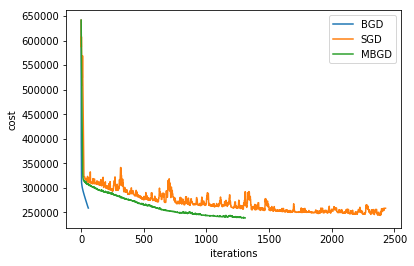

In [7]:
plt.plot(*zip(*cost_list_BGD))
plt.plot(*zip(*cost_list_SGD))
plt.plot(*zip(*cost_list_MBGD))
plt.legend(['BGD', 'SGD', 'MBGD'])
plt.xlabel("iterations")
plt.ylabel("cost")
plt.savefig("HW4P1.png")
plt.show()